# <font size=20 color=Teal>Data Science (Python)

## Índice

- [Documentação](#Documentação)
- [Análise Exploratória de Dados](#Análise-Exploratória-de-Dados)
- [Pré-Processamento de Dados](#Pré-Processamento-de-Dados)
- [Desenvolvimento de Modelos:](#Desenvolvimento-de-Modelos:)
- [Avaliação de Modelos](#Avaliação-de-Modelos)  
- [Visualização de Resultados](#Visualização-de-Resultados)


***
## Documentação
***

<font size=5>**Bibliotecas utilizadas:**
- **Pandas**
- **Pickle**
- **Sklearn** (Pipeline, SimpleImputer, StandardScaler, KNeighbors, classification_report, DecisionTreeClassifier, RandomForestClassifier, SVC, GridSearchCV)
- **scipy** (shapiro)
- **Seaborn, Matplotlib, Yellowbrick**(ConfusionMatrix), **Warnings**

<font size=5>**Descrição do problema:**
> Criar e treinar uma máquina, para indica se a pessoa é, uma boa ou má pagadora de empréstimos. Base de dados bastante simples, não ocorreu nenhuma dificuldade.



<font size=5>**Solução:**
1. **Separar o projeto por etapas** (para melhorar a compreenção).
2. **Análise Exploratória de Dados**
  * Visualizar os dados da base. Dados todos numericos, havia uma coluna chamada 'id' que foi retirada. Foi realizado a mudança do nome das colunas para maior compreenção.
  * Quantidade de registros, tirar uma base estatística
  * Verificar os valores faltantes. Havendo 3 na coluna 'idade'
3. **Pré-Processamento de Dados**
  * Foi verificado os valores faltantes. Encontrado 3 na coluna 'idade'. Substituido os valores faltantes pela média dos registros (idade). Na mesma coluna existia valores com idades negativa. O tratamento foi a substituição dos dados negativos por positivos

  * Separei o a base de dados em 2 variáveis: 'data' e 'label'. Label é a variável dependente que você está tentando prever com base nas features. Depois usei a biblioteca do **Sklearn (train_test_split)**, para realizar as amostras de treino e teste. Foram separadas 30% para teste, o restantes (70%), será treinado.

  * Usar a biblioteca **'Pickle'**, para criar uma nova base de dados, com o devido tratamento já realizado. Está nova base de dados criada, será usada para o aprendizado de máquina dos modelos seguintes.

4. **Desenvolvimento de Modelos:**
  * 1° Modelo usado foi **K-Nearest Neighbour**. Peguei a base de dados salvar anteriormente, treinei o modelo em cima desta base. Optei por criar de Pipeline com o sequência de etapas de processamento e normalização dos dados. Salvei o modelo para agilizar testes futuros.

  * Ocorreu os mesmos passo realizados anteriormente, nestes modelos: **Decision Tree, Random Forest, SVC.**

  * Para via de comparação, decidir usar a biblioteca **GridSearch**. Com base em seus resultados, deu para análisar se obtive bons resultados com as minha escolhas de parâmetros.

5. **Avaliação dos Modelos**  
> Resultados dos modelos por ordem crescente (com parâmetros escolhidos por mim):
 - 1° Random Forest - 98.6%
 - 2° KNN, SVM - 98.3%
 - 3° Decision Tree - 98.1%

> Resultados dos modelos por ordem crescente (com parâmetros escolhidos por GridSearch):
  - 1° Random Forest - 99%  (superior)
  - 2° Decision Tree - 98.7%  (superior)
  - 3° SVM - 94.5%  (pior q o meu modelo, além de ser muito lento)
  - 4° KNN - 85.5% (pior modelo treinado pelo GridSearch)






***
## Análise Exploratória de Dados
***

<font size=4> **Importar a biblioteca pandas, p/ ajuda na análise dos dados**

In [ ]:
import pandas as pd

<font size=4>**Sobre a base de dados Empréstimo**

- **Default**: indica se a pessoa pagou ou não o empréstimo
    * 0 = pagou
    * 1 = não pagou

- **clientid**: considerado uma variável categorica nominal. Considerado o 'CPF' do cliente.

- **income**: renda da pessoa. Var numerica e contínua.

- **age**: idade da pessoa. var do tipo contínuo, devido haver numeros após o '.', caso contrário seria discreta.

- **loan**: dívida que a pessoa possuí, var numerica contínua.



In [ ]:
# Abertura do arquivo csv, nomear as colunas, colocar como cabeçalho
df = pd.read_csv('credit_data.csv', names=['id','renda', 'idade', 'divida', 'resposta'],header=0)
# visualizar os 5 primeiros arquivos
df.head()

,id,renda,idade,divida,resposta
0,0,66155.925095,59.017015,8106.532131,0
1,1,34415.153966,48.117153,6564.745018,0
2,2,57317.170063,63.108049,8020.953296,0
3,3,42709.534201,45.751972,6103.642260,0
4,4,66952.688845,18.584336,8770.099235,1


<font size=4> **Excluir a coluna 'id'**

In [ ]:
df = df[['renda', 'idade', 'divida', 'resposta']]
df.tail()

,renda,idade,divida,resposta
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0
1999,69436.579552,56.152617,7378.833599,0


<font size=4>**Selecionar algumas colunas, para descrever os seus dados estatísticos**

**Renda**
- Média da renda dos clientes = 45 mil
- Menor renda dos clientes = 20 mil
- Maior renda dos clientes = 70 mil
- 1° Quartis = 32.796 mil
- Mediana Quartis = 45 mil
- 3° Quartis = 57.791 mil

**Idade**
- Média dos clientes = 40 anos
- <font color=red>Menor dos clientes = -52 anos  (realizar o tratamento, idade não compatível)</font>
- Maior dos clientes = 63 anos
- 1° Quartis = 28 anos
- Mediana Quartis = 41 anos
- 3° Quartis = 52 anos

**Dívida**
- Média = 4.444 mil
- Menor = 1.37
- Maior = 13.766 mil
- 1° Quartis = 1.939 mil
- Mediana Quartis = 3.974 mil
- 3° Quartis = 6.432 mil


In [ ]:
df[['renda', 'idade', 'divida']].describe()

,renda,idade,divida
count,2000.000000,1997.000000,2000.000000
mean,45331.600018,40.807559,4444.369695
std,14326.327119,13.624469,3045.410024
min,20014.489470,-52.423280,1.377630
25%,32796.459717,28.990415,1939.708847
50%,45789.117313,41.317159,3974.719419
75%,57791.281668,52.587040,6432.410625
max,69995.685578,63.971796,13766.051239


<font size=4>**Informações gerais sobre o Dataset**
- Total de linhas: 2 mil linhas
- Total de colunas: 5, sendo 2 tipo inteiro e 3 do tipo flutuante
- Na coluna 'idade', estão faltando 3 registros

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   renda     2000 non-null   float64
 1   idade     1997 non-null   float64
 2   divida    2000 non-null   float64
 3   resposta  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


<font size=4>**Quantidade de registros repetidos na variável 'resposta'**
- '0' = Bom pagador (1717 - exemplos)
- '1' = Mau pagador (283 - exemplos)

Está discrepância dos dados, irá pesa mais para o lado dos bons pagadores, afetando o julgamento da máquina de Machine Learning no momento que for realizada a predição.

In [ ]:
df.resposta.value_counts()

0    1717
1     283
Name: resposta, dtype: int64

<font size=4>**Somar a quantidade de valores nulos dentro do dataset**
- Na variável 'idade', temos 3 registros em faltando

In [ ]:
df.isnull().sum()

renda       0
idade       3
divida      0
resposta    0
dtype: int64

***
## Pré-Processamento de Dados
***

<font size=4>**Visualizar os registros que tenha idade negativa**

In [ ]:
df.query('idade <= 0')

,renda,idade,divida,resposta
15,50501.726689,-28.218361,3977.287432,0
21,32197.620701,-52.423280,4244.057136,0
26,63287.038908,-36.496976,9595.286289,0


<font size=4> **Tratar os dados de idade negativa**
- Criar uma função para substituir valores negativos por positivos
- Substitui valor negativo por seu valor absoluto
- Mantém valores positivos inalterados

In [ ]:
def substituir_negativo(valor):
    if valor < 0:       # se o valor for menor que '0'
        return -valor     #  Substitui valor negativo por seu valor absoluto
    else:                  # caso contrário
        return valor        # mantenha o valor positivo


# Aplicar a função à coluna "idade" do DataFrame
df['idade'] = df['idade'].apply(substituir_negativo)
df.query('idade <= 0')      # Visualizar o filtro de valores negativos, para testar o tratamento

,renda,idade,divida,resposta


<font size=4>**Tratar os valores faltantes**
- Tirar a média de idade do dataset, salvar em uma variável
- Adicionar está variável ao dataset para tratar os dados faltantes
- Fazer a verificação dos dados faltantes, para tirar as devidas conclusões

In [ ]:
media = df.idade.mean()
df.fillna(media, inplace=True)
df.isnull().sum()

renda       0
idade       0
divida      0
resposta    0
dtype: int64

<font size=4>**Visualizar as mudanças que ocorreram após o tratamento de dados**
- Tratamento foi realizado com sucesso!!
- Tantos os dados faltantes, como os negativos da variável 'idade', foram tratados.

In [ ]:
df.idade.describe()

count    2000.000000
mean       40.924874
std        13.257782
min        18.055189
25%        29.062492
50%        41.310898
75%        52.582340
max        63.971796
Name: idade, dtype: float64

<font size=4>**Separar as Features da Label**

**Features (Características):**
- Features são as variáveis independentes que você utiliza para fazer previsões ou classificações em um modelo de machine learning.
- São os atributos ou informações que o modelo utiliza como entrada para realizar suas previsões.

**Label (Rótulo ou Alvo):**
- O label é a variável dependente que você está tentando prever com base nas features.
- É o resultado ou a saída desejada do modelo. É o que você está tentando "aprender" com base nos padrões nos dados.
- No exemplo da previsão de empréstimo, o label seria fulano é bom ou mau pagador de empréstimo.

In [ ]:
# Usando para salvar os dados
import pickle
# # Dividir os dados em conjunto de treinamento e conjunto de teste
from sklearn.model_selection import train_test_split

- X são as features (características) dos dados
- y são os rótulos (labels) correspondentes
- test_size é a proporção dos dados que será usada como conjunto de teste (30% neste exemplo)
- random_state é uma semente de aleatoriedade para garantir que a divisão seja sempre a mesma

In [ ]:
features = df[['renda','idade','divida']]
labels = df['resposta']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,
                                                    random_state=123)

<font size=4> **Visualizar as novas variáveis criadas**

In [ ]:
print('labels:',y_train.shape, '\n\nFeatures: ', x_train)

labels: (1400,) 

Features:               renda      idade       divida
1404  28423.131471  61.671459  5282.849182
172   26039.021490  49.390402  2056.752382
712   47786.141064  29.708189  7181.478553
866   35950.488450  35.471847  2664.925675
1217  29279.749787  18.813099  2291.988119
...            ...        ...          ...
1122  23626.726789  34.293353  2173.767690
1346  48290.880460  30.036761  4902.975221
1406  25636.333569  55.782057  1239.688258
1389  39553.647377  53.690633  7063.898036
1534  38160.116498  31.328122  3429.901579

[1400 rows x 3 columns]


<font size=4>**Criar uma nova base de dados¶**

- Com as amostras já criadas pelo train_test_split

In [ ]:
import pickle

with open('emprestimo_data.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

**Abrir a base criada já seperando as amostras**

In [ ]:
with open('emprestimo_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

In [ ]:
x_train.shape, y_train.shape

((1400, 3), (1400,))

***
## Desenvolvimento de Modelos:
***

###  <font color=blue>K-Nearest Neighbour (KNN) - Modelo

**K vizinhos mais próximos**

* A maioria dos métodos de aprendizagem controem um modelo após o treinamento (os dados são descartados após a criação do modelo)

* Métodos baseados em instâncias simplesmente armazenam os exemplos de treinamento

* A generalização/ previsão é feita somente quando uma nova instância precisa ser classificada (lazy)

**Características**

* Algoritmo simples e poderoso
* Indicado quando o relacionamento entre as características é complexo
* **Valor de k pequeno:** dados com ruídos ou outliers podem prejudicar
* **Valor de k grande:** tendência a clasificar a classe com mais  elementos (overfitting) - valor default 3 ou 5

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # modelo
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: KNN

In [ ]:
knn = Pipeline([
        ('scaler', StandardScaler()),  # Normalização dos dados
        ('imputer', SimpleImputer(strategy='median')),  # substitui os valores NaN pela mediana
        ('knn',  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,))  # 5 vizinhos
])

knn.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('knn', KNeighborsClassifier())])

**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = knn.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(knn, open('knn.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
knn = pickle.load(open('knn.sav', 'rb'))

###  <font color=green>Decision Tree - Modelo

**Poda em árvore de decisão**

* Bias (viés)
  * Erros por classsificação errada
* variância
  * Erros por sensibilidade pequena a mudanças na base de treinamento
  * Pode levar a **overfitting**

**Overfitting**: Conseque classificar muito bem a base de treinamento, porém em uma base de teste, para verificar o que ele aprendeu, o mesmo comete muitos erros. Resumindo, ele decorar os dados ao inves de aprender.

**Vantagens**
* Fácil interpretação
* Não precisa normalização ou padronização
* Rápido para classificar novos registros
* Pode ser usada tanto na classificação, como na **regressão**

**Desvantagens**
* Geração de árvores muito complexas
* Pequenas mudanças nos dados pode mudar a árvore (poda pode ajudar)
* Problema NP-completo para construir a árvore

In [ ]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: Árvore de Decisão

In [ ]:
arvore = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('tree',  DecisionTreeClassifier(criterion='entropy', random_state=0))
])

arvore.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

<font size=3>**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = arvore.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(arvore, open('tree.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
arvore = pickle.load(open('tree.sav', 'rb'))

###  <font color=purple>Random Forest - Modelo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: Random Forest

In [ ]:
random = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('random',  RandomForestClassifier(n_estimators=100, criterion='entropy',
                                      random_state=0))
])

random.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('random',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

<font size=3>**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = random.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(random, open('random.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
random = pickle.load(open('random.sav', 'rb'))

###  <font color=teal>Máquina de Vetores de Suporte - SVM

* Em geral supera outros algoritmos de aprendizagem de máquina
* Tarefas complexas: reconhecimento de caracteres, voz, imagens
* Considerado por vários anos como o mais eficiente algoritmo

**Vantagens**

* Não é muito influenciado por ruídos nos dados
* Utilizado para classificação e regressão
* Aprende conceitos não presentes nos dados originais
* Mais fácil de usar do que redes neurais

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

In [ ]:
svm = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('svc',  SVC(kernel='rbf', random_state=0, C=2.0))
])

svm.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('svc', SVC(C=2.0, random_state=0))])

In [ ]:
previsoes = svm.predict(x_test)

In [ ]:
pickle.dump(svm, open('svm.sav', 'wb'))

In [ ]:
svm = pickle.load(open('svm.sav', 'rb'))

###  <font color=brow>Tuning dos parâmetros com GridSearch

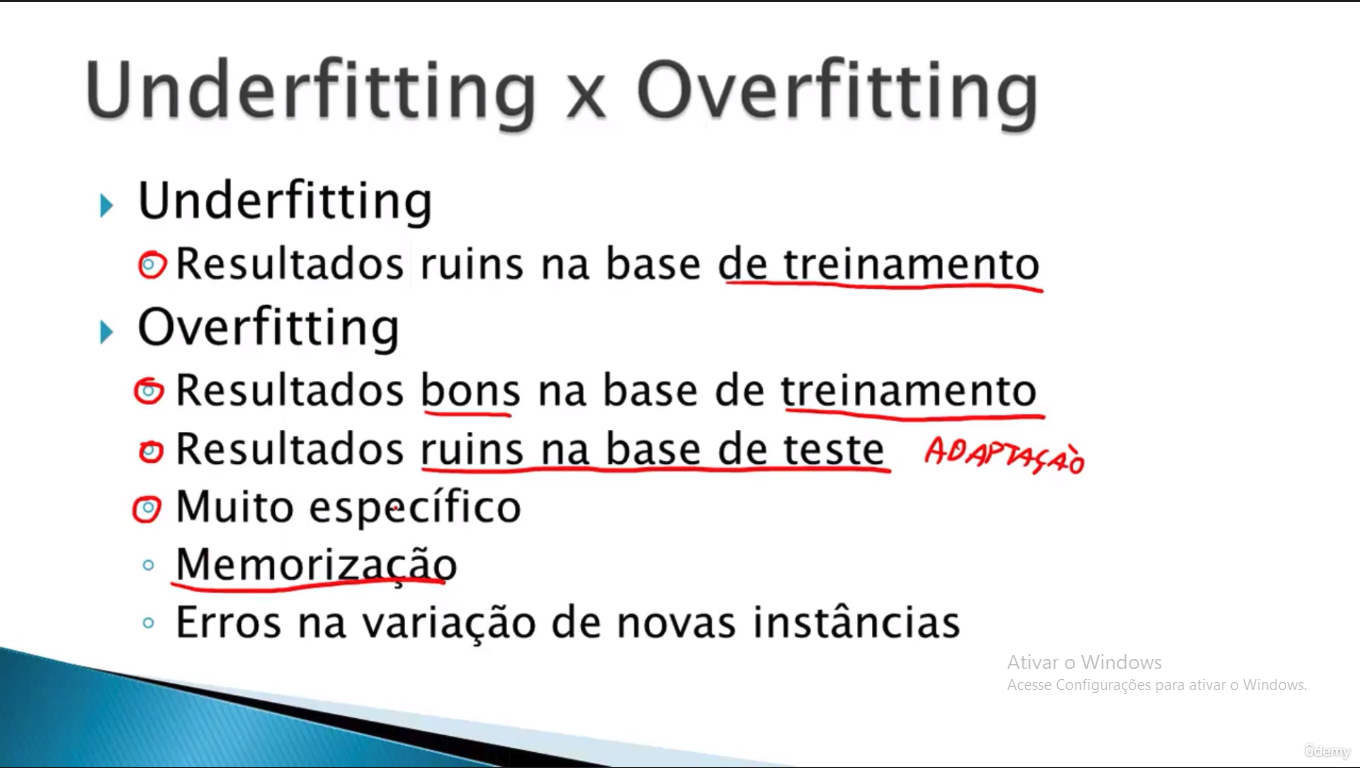

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

**Abertura dos dados**

In [ ]:
with open('emprestimo_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

**Juntando as 2 variáveis de treino e teste, para tuning dos parâmetros**

In [ ]:
data = np.concatenate((x_train, x_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

**Visualizar as features juntas**

In [ ]:
data

array([[2.84231315e+04, 6.16714587e+01, 5.28284918e+03],
       [2.60390215e+04, 4.93904022e+01, 2.05675238e+03],
       [4.77861411e+04, 2.97081893e+01, 7.18147855e+03],
       ...,
       [6.54819456e+04, 4.50385762e+01, 1.06142485e+04],
       [5.62560389e+04, 2.21605025e+01, 5.45224453e+03],
       [5.80823601e+04, 6.01563270e+01, 9.17566732e+03]])

####  <font color=green>Decision Tree - Modelo

**Passando os parâmetros a serem usados no modelo GridSearch**

In [ ]:
parametros_tree = {'criterion': ['gini','entropy'],
                                     'splitter': ['best','random'],  #default, random
                                     'min_samples_split': [2,5,10],
                                     'min_samples_leaf' : [1,5,10]
                                    }

####  <font color=purple>Random Forest - Modelo

In [ ]:
parametros_random = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]
              }

####  <font color=blue>K-Nearest Neighbour (KNN) - modelo

In [ ]:
parametros_knn = {'n_neighbors': [3,5,10,20],
              'p':[1,2]}

####  <font color=teal>Máquina de Vetores de Suporte - SVM

In [ ]:
parametros_svm = {'tol': [0.001, 0.0001,0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['lbfgs', 'linear', 'poly','sigmoid']
              }

***
## Avaliação dos Modelos
***

###  <font color=blue>K-Nearest Neighbour (KNN) - 98.3%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
accuracy_score(y_test, previsoes)

0.9833333333333333

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 97% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 99% dos dados de bons pagadores
  * ele está correto em 89% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=green>Decision Tree - 98.1%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
arvore.score(x_test, y_test)

0.9816666666666667

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 99% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 100% dos dados de bons pagadores
  * ele está correto em 90% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=purple>Random Forest - 98.6%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
random.score(x_test, y_test)

0.9866666666666667

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 100% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 100% dos dados de bons pagadores
  * ele está correto em 91% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=teal>Máquina de Vetores de Suporte - SVM - 98.3%

In [ ]:
svm.score(x_test, y_test)

0.9833333333333333

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=brow>Tuning dos parâmetros com GridSearch

####  <font color=green>Decision Tree - 98.7%

**Modelo irá escolher os melhores parâmetros, com melhor score**

In [ ]:
grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_tree)
grid_tree.fit(data, label)
melhores_parametros = grid_tree.best_params_
resultado = grid_tree.best_score_
print('Parâmetros: ', melhores_parametros)
print('Score: ', resultado)

Parâmetros:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Score:  0.9875


**Salvar o modelo que obteve o melhor resultado**

In [ ]:
pickle.dump(grid_tree, open('tree.sav', 'wb'))

**Realizar o teste**

In [ ]:
arvore = pickle.load(open('tree.sav', 'rb'))
arvore.best_score_

0.9875

####  <font color=purple>Random Forest - 99%

In [ ]:
grid_random = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_random)
grid_random.fit(data, label)
melhores_parametros = grid_random.best_params_
melhor_resultado = grid_random.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.9894999999999999


**Salvar o modelo que obteve o melhor resultado**

In [ ]:
pickle.dump(grid_random, open('random.sav', 'wb'))

**Realizar o teste**

In [ ]:
random = pickle.load(open('random.sav', 'rb'))
random.best_score_

0.9894999999999999

####  <font color=blue>K-Nearest Neighbour (KNN) - 85.5%

In [ ]:
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_knn.fit(data, label)
melhores_parametros = grid_knn.best_params_
melhor_resultado = grid_knn.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.8554999999999999


####  <font color=teal>Máquina de Vetores de Suporte - SVM - 94.5%  (é bem lento)

In [ ]:
grid_svm = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_svm.fit(data, label)
melhores_parametros = grid_svm.best_params_
melhor_resultado = grid_svm.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

{'C': 2.0, 'kernel': 'linear', 'tol': 0.001}
0.945


###  <font color=red>Validação Cruzada

**cross_val_score:**

É uma função que facilita a aplicação da validação cruzada K-Fold e o **cálculo do desempenho do modelo em cada dobra**.


In [ ]:
from sklearn.model_selection import cross_val_score

**Abrir os modelos já desenvolvidos**

In [ ]:
tree = pickle.load(open('tree.sav', 'rb'))
random = pickle.load(open('random.sav', 'rb'))
svm = pickle.load(open('svm.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))

**Cálcular o desempenho de cada modelo**

In [ ]:
scores_tree = cross_val_score(tree, data, label, cv=5)
scores_random = cross_val_score(random, data, label, cv=5)
scores_svm = cross_val_score(svm, data, label, cv=5)
scores_knn = cross_val_score(knn, data, label, cv=5)

**Criar um dataframe com os resultados da validação cruzada**

In [ ]:
resultados = pd.DataFrame({
    'Arvore': scores_tree,
    'Random Forest': scores_random,
    'SVM': scores_svm,
    'KNN': scores_knn,
})

resultados

,Arvore,Random Forest,SVM,KNN
0,0.9800,0.9875,0.9900,0.9775
1,0.9925,0.9800,0.9750,0.9725
2,0.9850,0.9925,0.9925,0.9800
3,0.9825,0.9850,0.9825,0.9800
4,0.9900,0.9900,0.9900,0.9825


**Quanto maior a variância, mais dispersos os valores estão em relação à média, e quanto menor a variância, mais próximos eles estão da média.**

In [ ]:
resultados.var()

Arvore           0.000027
Random Forest    0.000023
SVM              0.000052
KNN              0.000014
dtype: float64

**Estatística da Validação Cruzada**

- **Média do Decision Tree:** 98.7%, meu modelo conseguiu este resultado com ajuda do GridSearch

- **Mediana do Random Forest:** 99%, meu modelo conseguiu este resultado com ajuda do GridSearch

- **1° Quartil do SVM:** 98.2%, meu modelo Ficou um pouco acima deste quartil

- **Máximo do KNN:** 98.2%, meu modelo conseguiu 98.3%, o máximo do score

- **Desvio Padrão (std):** quanto menos o valor, mais consistente os resultados, pouca diferença nos resultados, quando for rodar o treino dos dados. Os melhores (**Random, KNN**)

In [ ]:
resultados.describe()

,Arvore,Random Forest,SVM,KNN
count,5.000000,5.000000,5.000000,5.000000
mean,0.986000,0.987000,0.986000,0.978500
std,0.005184,0.004809,0.007202,0.003791
min,0.980000,0.980000,0.975000,0.972500
25%,0.982500,0.985000,0.982500,0.977500
50%,0.985000,0.987500,0.990000,0.980000
75%,0.990000,0.990000,0.990000,0.980000
max,0.992500,0.992500,0.992500,0.982500


### Teste de Shapiro

In [ ]:
from scipy.stats import shapiro
from scipy import stats

**Avalie o p-valor para decidir se rejeitar a hipótese nula**

In [ ]:
alpha = 0.05

- **pvalue** = for igual ou menor que o valor de alpha=0.05, dados não são normais
- **pvalue** = acima do alpha=0.05, são dados normais

In [ ]:
shapiro(scores_tree), shapiro(scores_random), shapiro(scores_knn), shapiro(scores_svm)

(ShapiroResult(statistic=0.9523513913154602, pvalue=0.753972589969635),
 ShapiroResult(statistic=0.9787160754203796, pvalue=0.9276362061500549),
 ShapiroResult(statistic=0.9140781760215759, pvalue=0.4924813508987427),
 ShapiroResult(statistic=0.8707029223442078, pvalue=0.2692817151546478))

**Visualizar os registros da posição 5**

In [ ]:
novo_registro = data[5]
novo_registro = novo_registro.reshape(1,-1)
novo_registro, novo_registro.reshape

(array([[6.66889131e+04, 4.80852703e+01, 9.69030880e+03]]),
 <function ndarray.reshape>)

***
## Visualização de Resultados
***

#### Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix  # matrix de confusão

# suprimir a exibição de mensagens de aviso (warnings) durante a execução do código em Python.
import warnings
warnings.filterwarnings("ignore")

### Dashboards da base de dados

**Quantidade de registros por idade**
- Não pagaram emprestimo (1)
    - Onde temos mais registros de mau pagadores, estão entre 25 e 29 anos
    - Faixa etária de maus pagadores começa: 18 indo até 35 anos, sendo eles a minoria nessa faixa etária, havendo também bons pagadores, sendo eles a maioria

- Pagaram emprestimo (0)
    - Dos 35 anos em diante, não temos maus pagadores de empréstimo
    - Os melhores pagadores de empréstimos se encontra na casa dos 55 a 57 anos

<Axes: xlabel='idade', ylabel='Count'>

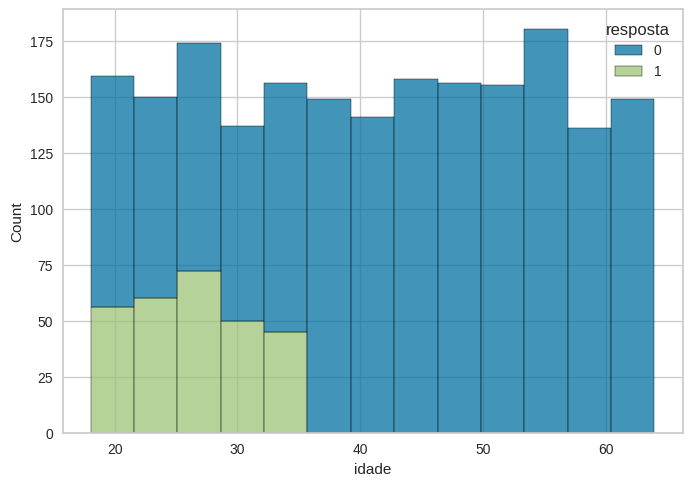

In [ ]:
sns.histplot(data=df, x="idade", hue="resposta", multiple="stack")

**Visualização das dívidas por labels**
- As dívidas de quem pagaram o empréstimo são menores, partindo de 2k até 6k
- As dívidas de quem não pagou o empréstimo são maiores, partindo de 6k até 9k. Podendo está relacionado ao juros devido ao atraso do pagamento.
- Temos algumas exceções (supostos Outliers), de dívidas que ultrapassam 12k, que foram pagas.

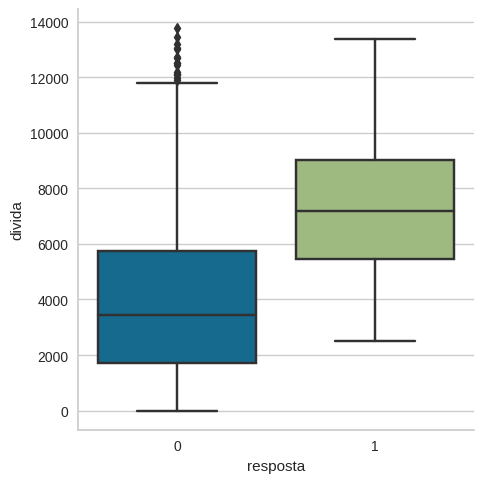

In [ ]:
sns.catplot(data=df, x="resposta", y="divida", kind="box")

**Visualização de renda por labels**
- Ambas as rendas são equivalentes

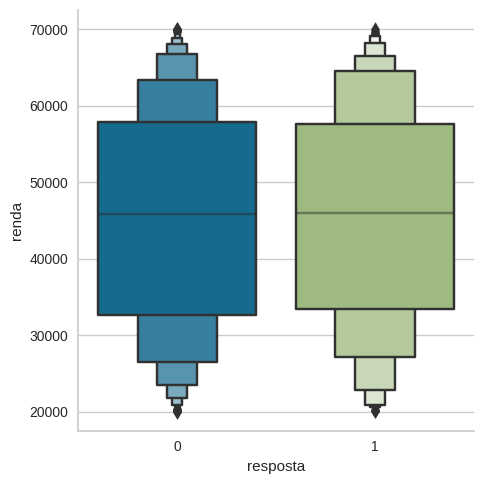

In [ ]:
sns.catplot(
    data=df.sort_values("resposta"),
    x="resposta", y="renda", kind="boxen",
)

**Distribuição dos dados**


![image.png](attachment:image.png)

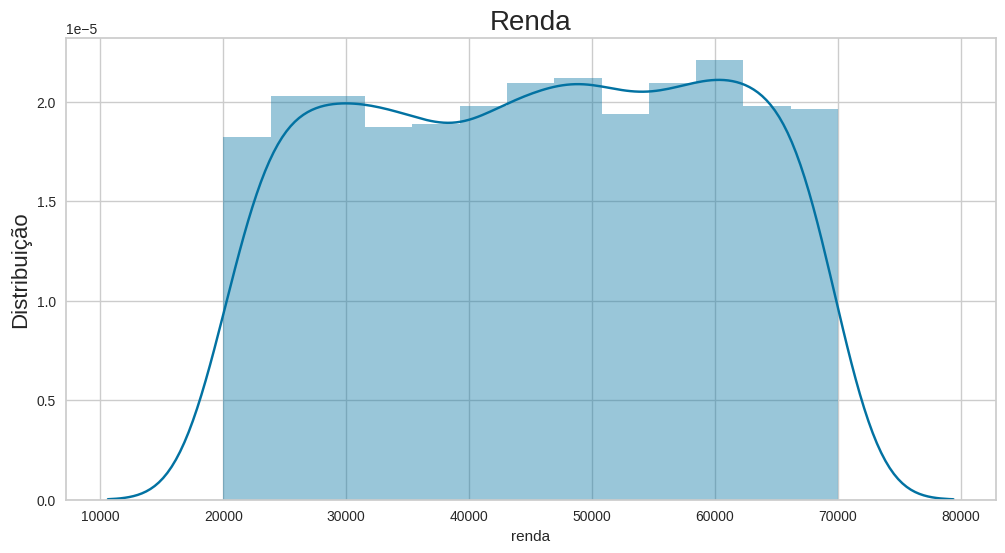

In [ ]:
ax =sns.distplot(df['renda'])
ax.figure.set_size_inches(12,6)
ax.set_title('Renda', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

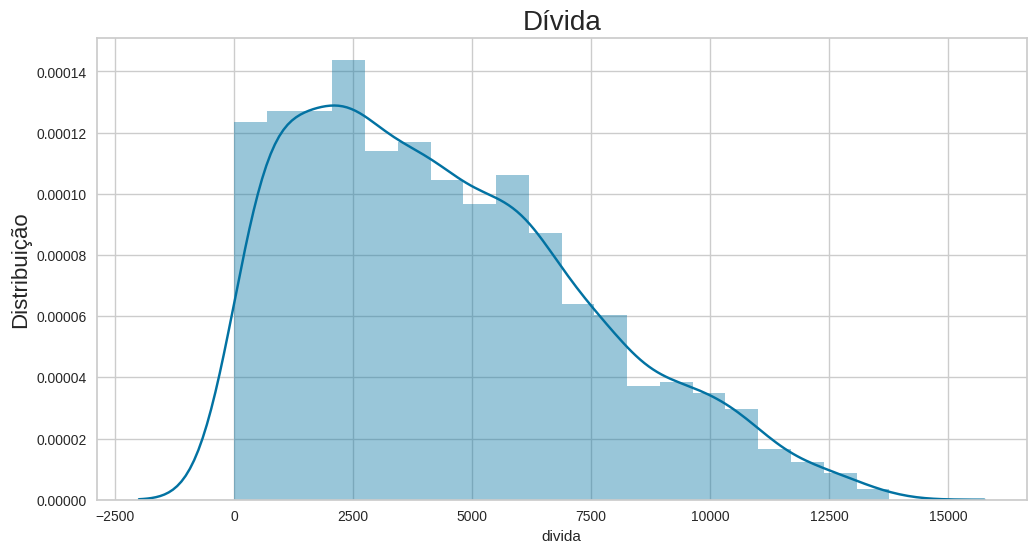

In [ ]:
ax =sns.distplot(df['divida'])
ax.figure.set_size_inches(12,6)
ax.set_title('Dívida', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

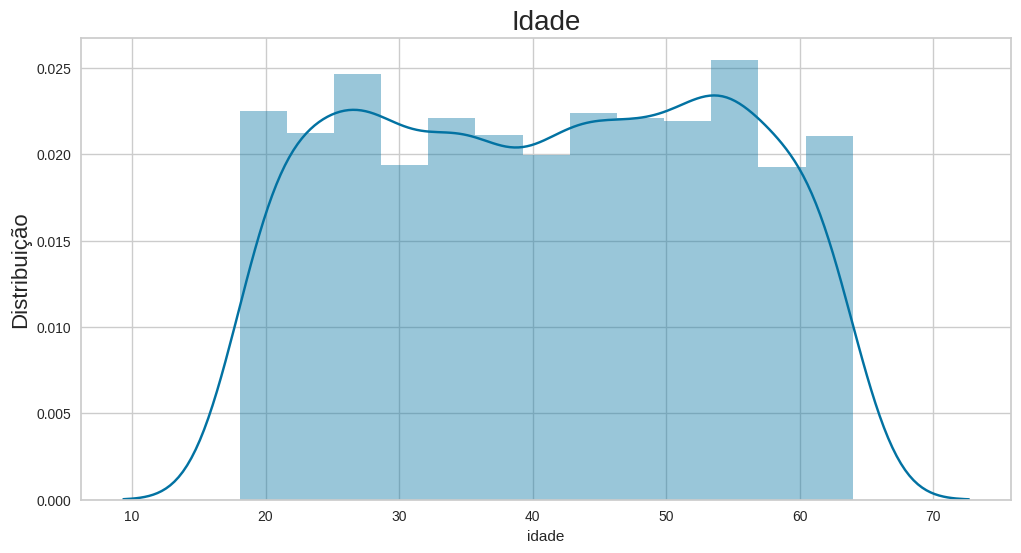

In [ ]:
ax =sns.distplot(df['idade'])
ax.figure.set_size_inches(12,6)
ax.set_title('Idade', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

### Dashboards das máquinas de predição

####  <font color=blue>K-Nearest Neighbour (KNN) - Matrix de Confusão

0.9766666666666667

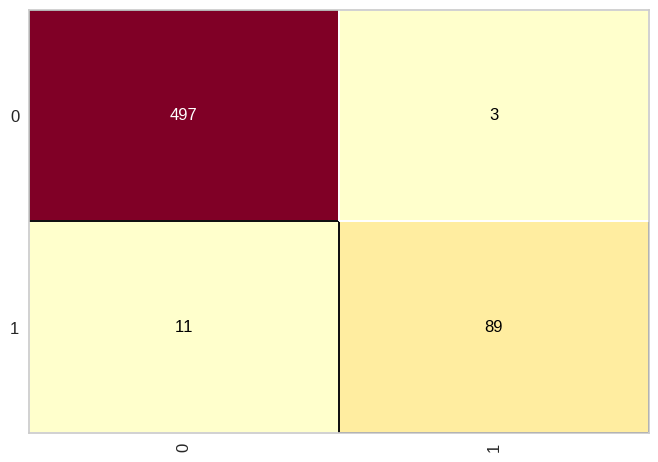

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

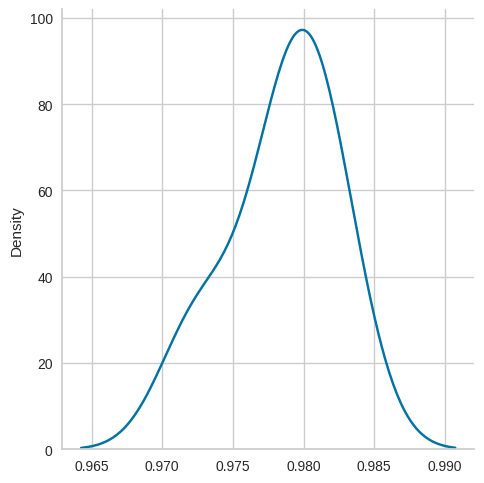

In [ ]:
sns.displot(scores_knn, kind='kde')

####  <font color=green>Decision Tree - Matrix de Confusão

1.0

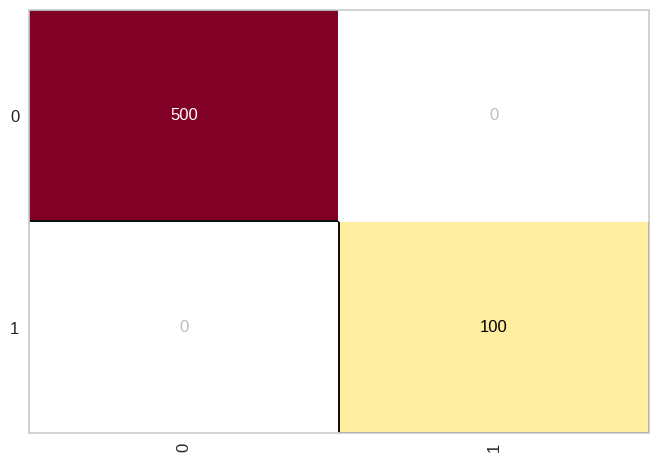

In [ ]:
cm = ConfusionMatrix(arvore)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

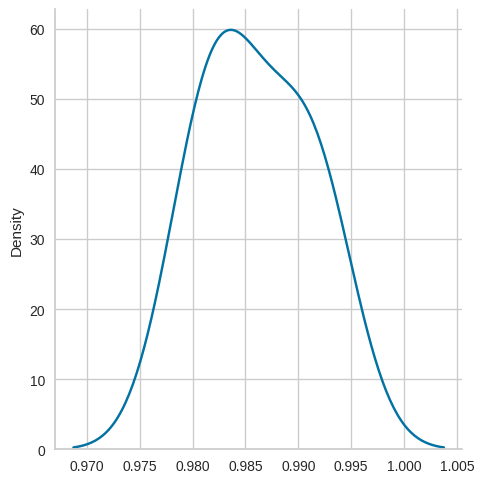

In [ ]:
sns.displot(scores_tree, kind='kde')

####  <font color=purple> Random Forest - Matrix de Confusão

1.0

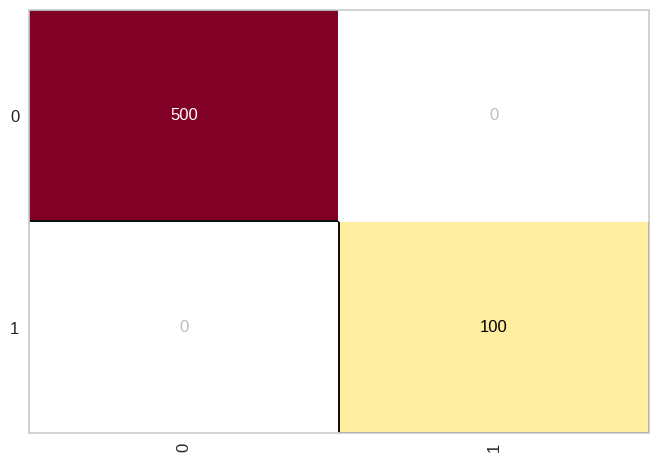

In [ ]:
cm = ConfusionMatrix(random)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

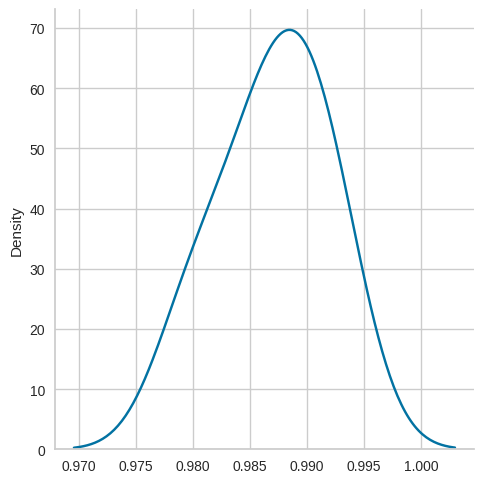

In [ ]:
sns.displot(scores_random, kind='kde')

####  <font color=teal>Máquina de Vetores de Suporte - SVM -Matrix de Confusão

0.9833333333333333

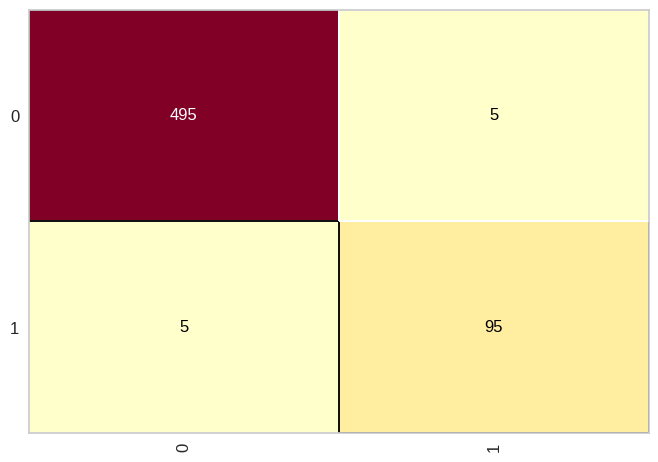

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

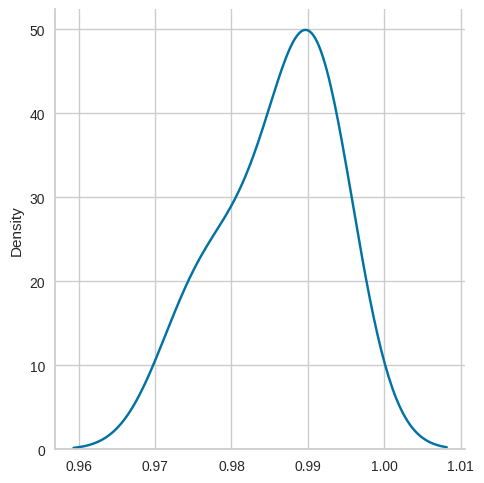

In [ ]:
sns.displot(scores_svm, kind='kde')